# Capstone Project Sandboo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

#import drawSvg as draw
import nimcity
from nimcity import Simulation, Council, Developer, Household
from nimcity import District, Block, Residence, Unit
from nimcity import History

C:\Users\Stee\Anaconda3good\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# San Francisco

In [19]:
#Annual population 1970 - 2018
#See https://fred.stlouisfed.org/series/CASANF0POP
sf1970 = pd.read_csv('sf1970.csv')
dates = [int(date[:4]) for date in sf1970['DATE'].values]
sf1970['DATE'] = dates
sf1970 = sf1970.set_index('DATE')
sf1970.rename(columns = {'CASANF0POP': 'population'}, inplace = True)

In [60]:
sf1970

,population
DATE,
1970,715.674
1971,708.100
1972,700.200
1973,700.000
1974,698.400
1975,686.100
1976,686.100
1977,679.400
1978,677.700


In [61]:
pop_values = sf1970['population'].values[10:]

In [62]:
pop_growth_raw = [pop_values[0]]
pop_growth_raw.extend([pop_values[i + 1] - pop_values[i] for i, p in enumerate(pop_values[1:-1])])

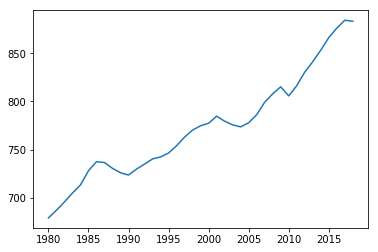

In [86]:
plt.plot(sf1970[sf1970.index > 1979])

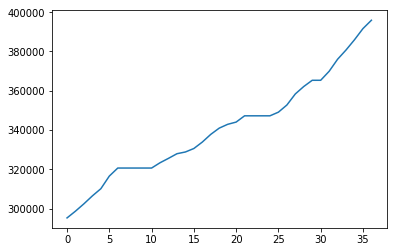

In [120]:
#Convert this population growth into household growth for the model
pop_growth_arr = np.array(pop_growth_raw) * 1000
#See https://housing.datasf.org/data-browser/population-and-households/average-household-size/
household_size_avg = 2.3
sf_hh_pop_growth = np.array([p / household_size_avg if p > 0 else 0 for p in pop_growth_arr])
#The trend for this population should resemble the trend of the actual population
plt.plot([sum(hh_pop_growth[:i+1]) for i, p in enumerate(sf_hh_pop_growth[:-1])])

In [206]:
#SF
LAND = 100052000 
zoning = [{0: 1,},
          {0: 1, },
          {0: 1, }, #10: 4,},
          {0: 1, 1: 4},#10: 8,},
          {0: 1, 1: 4}, #10: 8,},
          {0: 2, 1: 4},
          {0: 2, 1: 4},
          {0: 4, },
          {0: 4, 10: 8, 20: 12, 30: 16},
          {0: 10, 15: 16, 20:25},]
price_sqft = 1
construct_p = 1
demolish_p = 1
dev_count = 1
init_rounds_of_dev = 3
council_count = 1
pop_growth = [int(p) for p in np.flip(sf_hh_pop_growth)]
#Households:
has_avg = 2500
has_std = 500
own_p = 1

In [207]:
%%time
#Create sim for SF
sim = Simulation(land = LAND,
                 zoning = zoning,
                 price_sqft = price_sqft,
                 dev_count = dev_count,
                 construct_p = construct_p,
                 demolish_p = demolish_p,
                 init_rounds_of_dev = init_rounds_of_dev,
                 council_count = council_count,
                 pop_growth = pop_growth, 
                 has_avg = has_avg, 
                 has_std = has_std,
                 own_p = own_p
                 )

Simulation started.


C:\Users\Stee\Documents\DataScienceBootCamp\CourseMaterials\Module05\sunday\housing_market_simulator\nimcity.py:556: RuntimeWarning: divide by zero encountered in true_divide
  build_count = (b.zoned_as[-1] / np.arange(self.zoning_max))


1961 blocks have enough land for new residences.
37144 new residences built.
1025 blocks have enough land for new residences.
15283 new residences built.
0 blocks have enough land for new residences.
0 new residences built.
Developer built 52427 residences to start.
237908 units available for households looking.
237908 households can afford the units available.
237757 households out of 237908 found housing.
0.0006% of households seeking housing could not find any.


At end of time step 0:
10 districts containing 1961 blocks on 100011000 sqft of land.
0.53% of land is unbuilt upon.
50.029999999999994% of blocks are zoned for single-family housing.
Developers built 52427 residences this time step and demolished 0.
Total residences: 52427.
Total units: 238867. Occupied: 99.53999999999999%. Vacant: 0.45999999999999996%.
Price per sqft of new housing is now 1.
Councils: 1. Developers: 1.
Total population of households: 295206. Housed: 80.54%. Unhoused: 19.46%.
Average income of new househol

#  Running a sim

In [208]:
%%time
#Run the simulation for as many time steps as there are columns in the zoning array.
sim.run()



Time Step 1


3591 new households arrived.
0 blocks have enough land for new residences.
0 new residences built.
66 units available for households looking.
3 households can afford the units available.
3 households out of 3 found housing.
0.0% of households seeking housing could not find any.
0 households moved out of their unit.
16081 residences are underzoned and could be demolished.
2556 residences demolished.
At end of time step 1:
10 districts containing 1961 blocks on 100011000 sqft of land.
5.65% of land is unbuilt upon.
30.04% of blocks are zoned for single-family housing.
Developers built 0 residences this time step and demolished 2556.
Total residences: 52427.
Total units: 238867. Occupied: 95.93%. Vacant: 4.07%.
Price per sqft of new housing is now 1.02.
Councils: 1. Developers: 1.
Total population of households: 298797. Housed: 76.69%. Unhoused: 23.31%.
Average income of new households will be 2550.0.


Time Step 2


4253 new households arrived.


C:\Users\Stee\Documents\DataScienceBootCamp\CourseMaterials\Module05\sunday\housing_market_simulator\nimcity.py:556: RuntimeWarning: divide by zero encountered in true_divide
  build_count = (b.zoned_as[-1] / np.arange(self.zoning_max))


540 blocks have enough land for new residences.
1328 new residences built.
27528 units available for households looking.
27528 households can afford the units available.
27479 households out of 27528 found housing.
0.0018% of households seeking housing could not find any.
0 households moved out of their unit.
13602 residences are underzoned and could be demolished.
2443 residences demolished.


Prices spike!
Unmet demand for housing valued less than 2070.245919722057
leads to a price spike of 1.0%
for units at or below this value.
Prices rise for 246541 units.
Price per sqft of new housing also rises to 1.050804.


At end of time step 2:
10 districts containing 1961 blocks on 100011000 sqft of land.
4.130000000000001% of land is unbuilt upon.
30.04% of blocks are zoned for single-family housing.
Developers built 1328 residences this time step and demolished 2443.
Total residences: 51199.
Total units: 257801. Occupied: 97.96000000000001%. Vacant: 2.04%.
Price per sqft of new housing is 

Total population of households: 329374. Housed: 95.08%. Unhoused: 4.92%.
Average income of new households will be 2929.148452505664.


Time Step 9


3165 new households arrived.
62 blocks have enough land for new residences.
95 new residences built.
702 units available for households looking.
702 households can afford the units available.
661 households out of 702 found housing.
0.0584% of households seeking housing could not find any.
0 households moved out of their unit.
1 residences are underzoned and could be demolished.
1 residences demolished.


Prices spike!
Unmet demand for housing valued less than 3537.4552547629237
leads to a price spike of 5.84045584045584%
for units at or below this value.
Prices rise for 311210 units.
Price per sqft of new housing also rises to 1.3446485312682723.


At end of time step 9:
10 districts containing 1961 blocks on 100011000 sqft of land.
0.58% of land is unbuilt upon.
30.04% of blocks are zoned for single-family housing.
Developers built 95 re

At end of time step 16:
10 districts containing 1961 blocks on 100011000 sqft of land.
0.63% of land is unbuilt upon.
30.04% of blocks are zoned for single-family housing.
Developers built 0 residences this time step and demolished 5.
Total residences: 43800.
Total units: 328067. Occupied: 99.16%. Vacant: 0.84%.
Price per sqft of new housing is now 2.6410534319592527.
Councils: 1. Developers: 1.
Total population of households: 347471. Housed: 93.62%. Unhoused: 6.38%.
Average income of new households will be 3431.9642627265303.


Time Step 17


3189 new households arrived.
0 blocks have enough land for new residences.
0 new residences built.
971 units available for households looking.
6 households can afford the units available.
6 households out of 6 found housing.
0.0% of households seeking housing could not find any.
0 households moved out of their unit.
No residences can be demolished.
At end of time step 17:
10 districts containing 1961 blocks on 100011000 sqft of land.
0.63% of lan

0.1664% of households seeking housing could not find any.
0 households moved out of their unit.
7 residences are underzoned and could be demolished.
7 residences demolished.


Prices spike!
Unmet demand for housing valued less than 2132.7958062174453
leads to a price spike of 16.640665626625065%
for units at or below this value.
Prices rise for 141932 units.
Price per sqft of new housing also rises to 4.548207447922369.


At end of time step 24:
10 districts containing 1961 blocks on 100011000 sqft of land.
0.8999999999999999% of land is unbuilt upon.
30.04% of blocks are zoned for single-family housing.
Developers built 30 residences this time step and demolished 7.
Total residences: 43857.
Total units: 367984. Occupied: 98.7%. Vacant: 1.3%.
Price per sqft of new housing is now 4.548207447922369.
Councils: 1. Developers: 1.
Total population of households: 366770. Housed: 99.03%. Unhoused: 0.97%.
Average income of new households will be 4021.093123688063.


Time Step 25


2354 new hous

Total residences: 43857.
Total units: 368231. Occupied: 89.62%. Vacant: 10.38%.
Price per sqft of new housing is now 9.84134722991939.
Councils: 1. Developers: 1.
Total population of households: 374064. Housed: 88.22%. Unhoused: 11.78%.
Average income of new households will be 4618.9720394635515.


Time Step 32


4095 new households arrived.
0 blocks have enough land for new residences.
0 new residences built.
35095 units available for households looking.
12488 households can afford the units available.
6999 households out of 12488 found housing.
0.4395% of households seeking housing could not find any.
0 households moved out of their unit.
No residences can be demolished.


Prices spike!
Unmet demand for housing valued less than 3921.6855358444845
leads to a price spike of 20.0%
for units at or below this value.
Prices rise for 152184 units.
Price per sqft of new housing also rises to 12.045809009421333.


At end of time step 32:
10 districts containing 1961 blocks on 100011000 sqft o

# Visualizing a district

In [ ]:
# drawing = draw.Drawing(400, 400, origin = (0,0))
# draw_district(drawing = drawing, 
#               column_max = 6, 
#               blocks = [b for d in sim.districts[-1] for b in d.blocks[-1]],
#              time_step = 9)
# drawing.setPixelScale(5) 

# Visualizing the history


In [209]:
%%time
hist = History(sim)

Wall time: 1min 53s


In [ ]:
#Option to add 

zones = np.unique(zoning)
construction_by_zone = []
d = sim.developers[-1][0]
for z in zones:
    c_by_z = [len([r for r in r_list if r.zoned_as == z]) for r_list in d.residences_built]
    construction_by_zone.append(c_by_z)

fig = plt.figure(figsize = (12,8))

for c,z in zip(construction_by_zone, zones):
    plt.plot(c, label = z)
plt.xlabel('Year')
plt.legend()
plt.title('Residences constructed by zoning type')

# Looking at districts

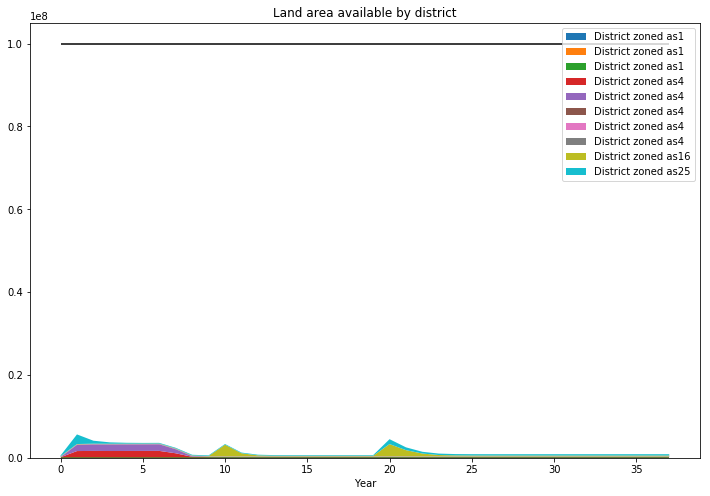

In [210]:
#Districts: available land area
district_labels = ['District zoned as' + str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
#Sanity check that all these add up to the total
#plt.plot(hist.all_by_year['empty_land'], label = 'Total land area available for building')
plt.stackplot(hist.by_districts[0].index, np.array([district['empty_land'] for district in hist.by_districts]),
             labels = district_labels,)
plt.hlines(sum([b.size for b in sim.blocks[-1]]), hist.by_districts[0].index[0], hist.by_districts[0].index[-1])
plt.xlabel('Year')
plt.legend()
plt.title('Land area available by district')
plt.show()

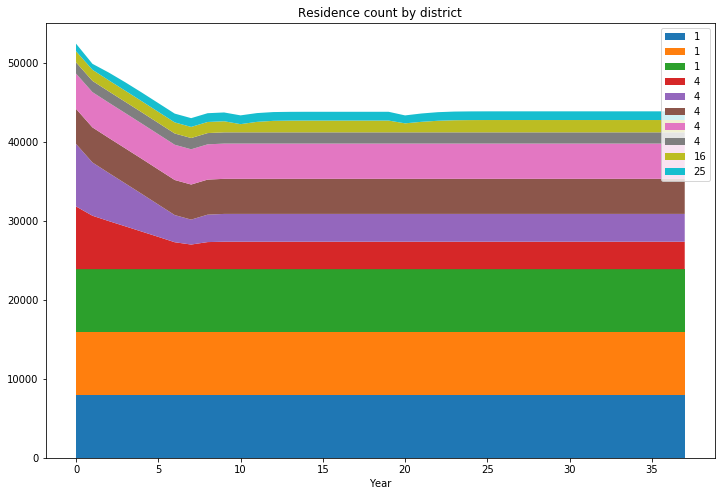

In [211]:
#Districts: residence counts
district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
plt.stackplot(hist.by_districts[0].index, np.array([district['r_count'] for district in hist.by_districts]),
             labels = district_labels,)
plt.xlabel('Year')
plt.legend()
plt.title('Residence count by district')
plt.show()

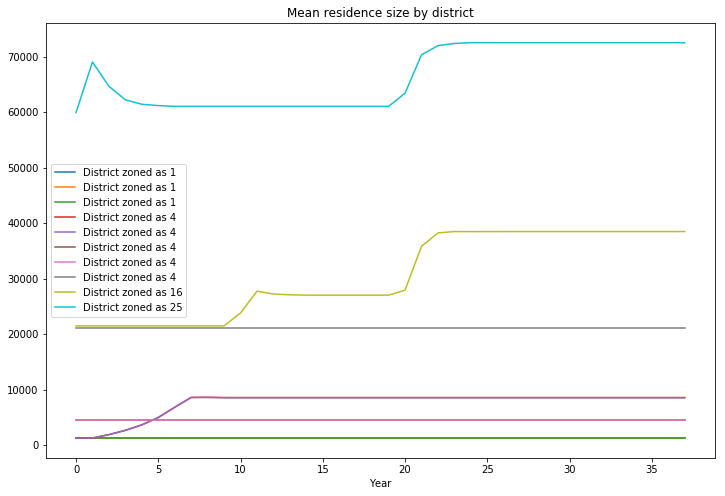

In [212]:
#Districts: mean residence size
district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
for i, label in enumerate(district_labels):
    plt.plot(hist.by_districts[i]['r_size_mean'], label = 'District zoned as ' + label)
plt.xlabel('Year')
plt.legend()
plt.title('Mean residence size by district')
plt.show()

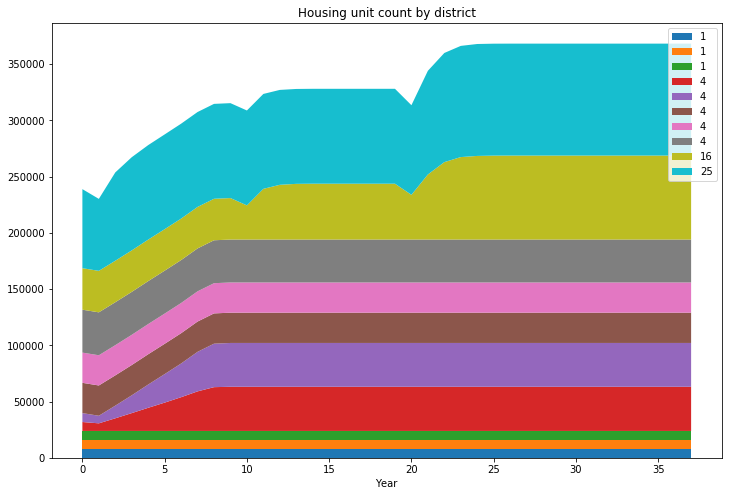

In [213]:
#Districts: housing unit counts
district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
plt.stackplot(hist.by_districts[0].index, np.array([district['u_count'] for district in hist.by_districts]),
             labels = district_labels,)
plt.xlabel('Year')
plt.legend()
plt.title('Housing unit count by district')
plt.show()

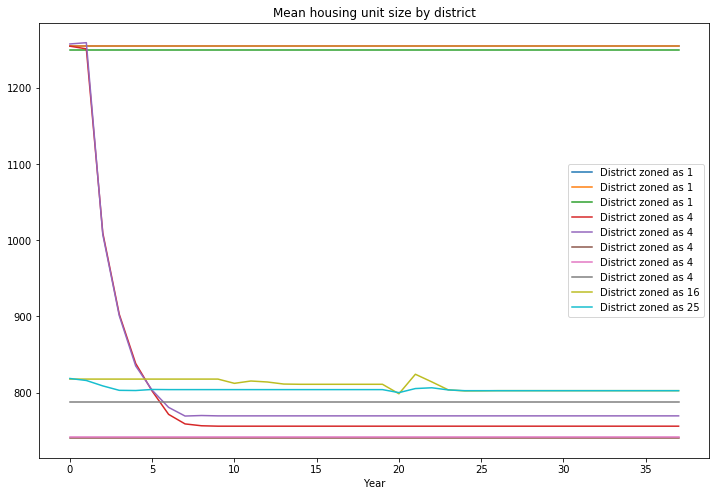

In [214]:
#Districts: mean housing unit size
district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
for i, label in enumerate(district_labels):
    plt.plot(hist.by_districts[i]['u_size_mean'], label = 'District zoned as ' + label)
plt.xlabel('Year')
plt.legend()
plt.title('Mean housing unit size by district')
plt.show()

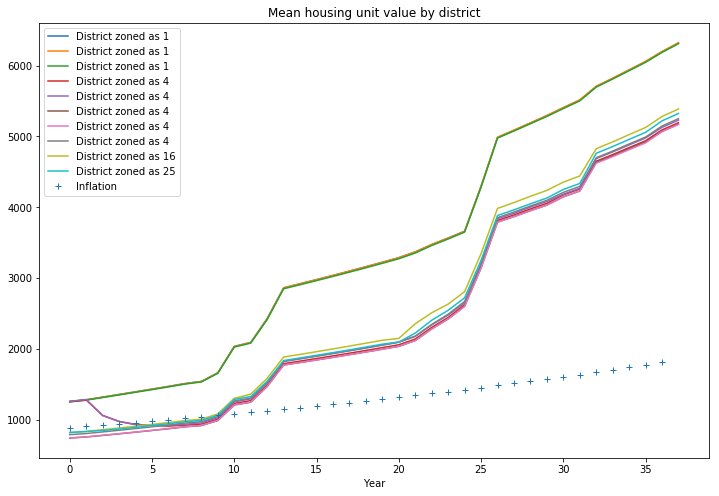

In [215]:
#Districts: mean housing unit value
INFLATION = 0.02
#Show inflation starting with mean unit value from first time step 
inflation_x = np.arange(len(sim.pop_growth))
inflation_y = []
y = hist.all_by_year['u_value_mean'][0]
for x in inflation_x:
    y += y * INFLATION
    inflation_y.append(y)


district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
for i, label in enumerate(district_labels):
    plt.plot(hist.by_districts[i]['u_value_mean'], label = 'District zoned as ' + label)
plt.plot(inflation_x, inflation_y, '+', label ='Inflation')
plt.xlabel('Year')
plt.legend()
plt.title('Mean housing unit value by district')
plt.show()

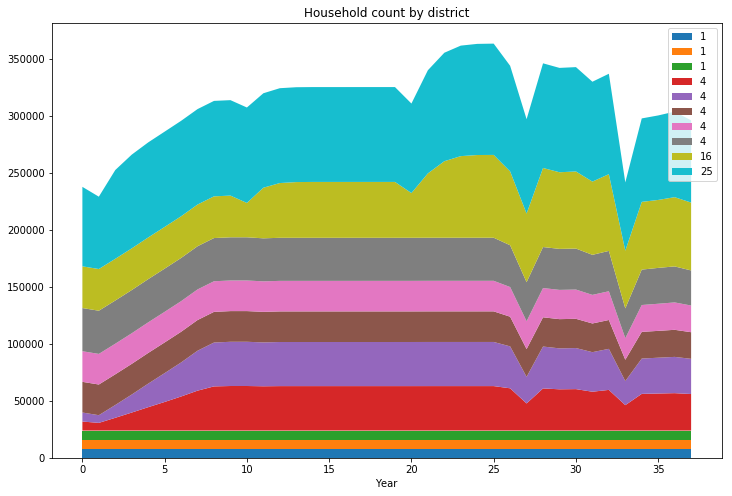

In [216]:
#Districts: household counts
district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
plt.stackplot(hist.by_districts[0].index, np.array([district['h_count'] for district in hist.by_districts]),
             labels = district_labels,)
plt.xlabel('Year')
plt.legend()
plt.title('Household count by district')
plt.show()

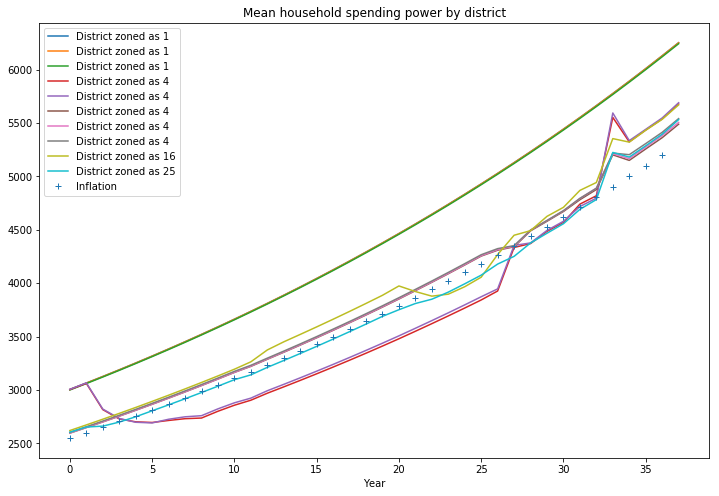

In [217]:
#Districts: household spending power
#Show inflation starting with average spending power from first time step
inflation_x = np.arange(len(sim.pop_growth))
inflation_y = []
y = has_avg
for x in inflation_x:
    y += y * INFLATION
    inflation_y.append(y)

district_labels = [str(d.zoned_as[-1]) for d in sim.districts[-1]]
fig = plt.figure(figsize = (12,8))
for i, label in enumerate(district_labels):
    plt.plot(hist.by_districts[i]['h_income_mean'], label = 'District zoned as ' + label)
plt.plot(inflation_x, inflation_y, '+', label ='Inflation')
plt.xlabel('Year')
plt.legend()
plt.title('Mean household spending power by district')
plt.show()

# Looking at totals

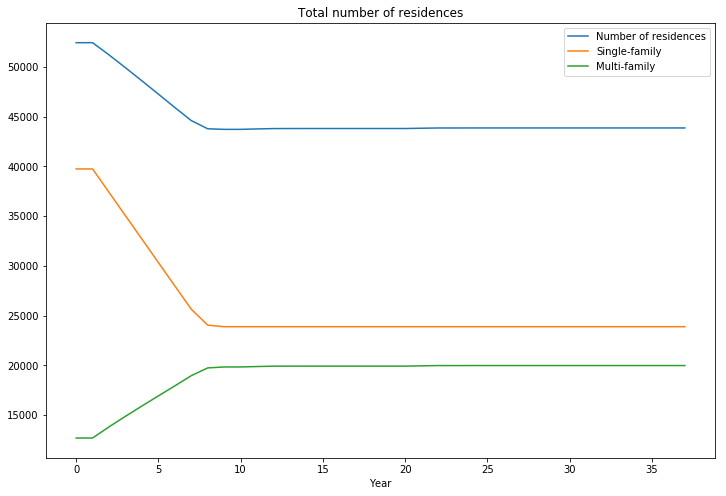

In [218]:
#Housing and households by year
fig = plt.figure(figsize = (12, 8))
plt.plot(hist.all_by_year['r_count'], label = 'Number of residences')
plt.plot(hist.all_by_year['r_single_u_count'], label = 'Single-family')
plt.plot(hist.all_by_year['r_multi_u_count'], label = 'Multi-family')
plt.xlabel('Year')
plt.legend()
plt.title('Total number of residences')
plt.show()

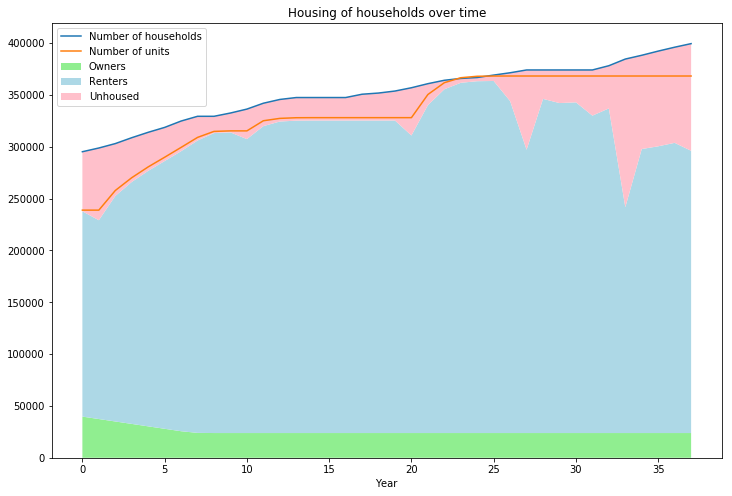

In [219]:
#Look at housing situation of all households by year
fig = plt.figure(figsize = (12, 8))
#Leaving this in as a sanity check that the other groups add up to the toal
plt.plot(hist.all_by_year['h_count'], label = 'Number of households')
plt.plot(hist.all_by_year['u_count'], label = 'Number of units')
plt.stackplot(hist.all_by_year.index, 
             hist.all_by_year['h_own_count'],
             hist.all_by_year['h_rent_count'],
              hist.all_by_year['h_unhoused'],
             labels = ['Owners', 'Renters', 'Unhoused'],
             colors = ['lightgreen', 'lightblue', 'pink'])
plt.xlabel('Year')
plt.legend()
plt.title('Housing of households over time')
plt.show()

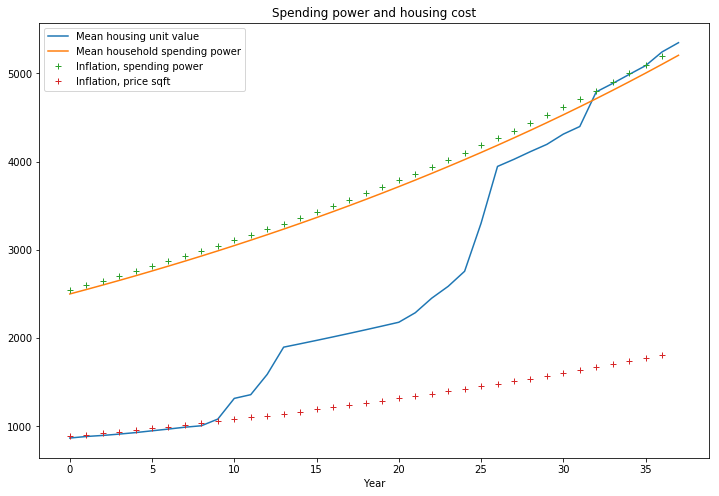

In [220]:
#Look at household spending power versus housing costs

has_inflat_x = np.arange(len(sim.pop_growth))
has_inflat_y = []
y = has_avg
for x in has_inflat_x:
    y += y * INFLATION
    has_inflat_y.append(y)

sqft_inflat_x = np.arange(len(sim.pop_growth))
sqft_inflat_y = []
y = hist.all_by_year['u_value_mean'][0]
for x in sqft_inflat_x:
    y += y * INFLATION
    sqft_inflat_y.append(y)
    
fig = plt.figure(figsize = (12, 8))
plt.plot(hist.all_by_year['u_value_mean'], label = 'Mean housing unit value')
plt.plot(hist.all_by_year['h_income_mean'],  label = 'Mean household spending power')
plt.plot(has_inflat_x, has_inflat_y, '+', label ='Inflation, spending power')
plt.plot(sqft_inflat_x, sqft_inflat_y, '+', label ='Inflation, price sqft')
plt.xlabel('Year')
plt.legend()
plt.title('Spending power and housing cost')
plt.show()

# CRAP

In [ ]:
#pop_growth = [100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
#LAND = 500010000

#FORTY YAER SIM
# LAND = 8000200 

#Currently using this zoning for testing demolition
# zoning = np.array([[1, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [1, False, False, False, 2, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [1, False, False, False, 4, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [1, False, False, False, 4, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [1, False, False, False, 16, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [4, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [4, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [4, False, False, False, 8, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [4, False, False, False, 16, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False],
# [16, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False,  False, False, False, False, False, False, False, False, False, False]])
# # price_sqft = 5
# dev_count = 1
# construct_p = 1
# demolish_p = 1
# init_rounds_of_dev = 3
# council_count = 1
# pop_growth = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
#                 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,    
#                 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
#                 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 30000]
# #Households:
# has_avg = 2500
# has_std = 500
# own_p = 1


In [ ]:
# Simulation.create_councils = create_councils
# Simulation.create_blocks = create_blocks
# Simulation.create_districts = create_districts
# Simulation.round_of_zoning = round_of_zoning
# Simulation.create_developers = create_developers
# Simulation.round_of_developing = round_of_developing
# Simulation.create_households = create_households
# Simulation.round_of_moving_in = round_of_moving_in
# Simulation.print_stats = print_stats
# Simulation.round_of_moving_out = round_of_moving_out
# Simulation.round_of_demolishing = round_of_demolishing
# Simulation.respond_to_demand = respond_to_demand
# Simulation.time_step = time_step
# Simulation.run = run

# VARIOUS CHECKS FOR OBJECTS IN SIM

In [ ]:
#For debugging mismatched list lengths in history object
# for i, d in enumerate(sim.districts[-1]):
#     print(f'district {i}')
#     print('\n')
#     for b_ in b_range:
#         print(f'time step {b_}')
#         for j, b in enumerate(d.blocks[-1]):
#             print(f'block {j}')
#             for k, r in enumerate(b.residences[i]):
#                 print(f'residence {k}')
#                 for l, u in enumerate(r.units[-1]):
#                     print(f'unit {l}')
#                     print(u.occ[i].has[i] if u.occ[i] else u.occ[i])

In [ ]:
#Zoning of each district
#[d.zoned_as[-1] for d in sim.districts[-1]]

#How many blocks per district
#[len(d.blocks[-1]) for d in sim.districts[-1]]

#CHECK FOR UNIT COUNTS IN DIFFERENT SIZED RESIDENCES
#how to write nested comp: smallest for biggest in biggest for second biggest in second biggest for third biggest in third biggest
#r_sizes = [r.size for d in sim.districts[-1] for b in d.blocks[-1] for r in b.residences[-1]]
#r_unit_count = [len(r.units[-1]) for d in sim.districts[-1] for b in d.blocks[-1] for r in b.residences[-1]]
#for size, unit_count in zip(r_sizes, r_unit_count):
#    print(size, unit_count)

In [ ]:
#For history object
#Test for lengths of these lists. They should all be equal length.
# print(len(residences_count))
# print(len(residence_size_avg))
# print(len(units_count))
# print(len(unit_size_avg))
# print(len(unit_value_avg))
# print(len(household_count))
# print(len(households_housed))
# print(len(households_unhoused))
# print(len(household_age_avg))
# print(len(household_has_avg))

In [ ]:
#This is the available area on one lot
#(sim.lots[0][0].size - sum([r.size for r in sim.lots[0][0].residences[0]]))

#Available area for all lots in one year
#[(l.size - sum([r.size for r in l.residences[0]])) \
#     for l in sim.lots[0]]

#Total area for one year vs avail area for one year
#total = sum([l.size  for l in sim.lots[0]])
#avail = sum([(l.size - sum([r.size for r in l.residences[0]])) \
     #for l in sim.lots[0]])

In [ ]:
#Check sizes of all lots
#sum([lot.size for lot in sim.lots[-1]])

In [ ]:
#Check size of each residence
#[residence.size for lot in sim.lots[-1] for residence in lot.residences[-1]]

In [ ]:
#Check size of each unit
#unit_sizes = [unit.value for lot in sim.lots[-1] for residence in lot.residences[-1] for unit in residence.units[-1]]

In [ ]:
#Check area of each residence that isn't carved into units
#[(residence.size - sum(unit.size for unit in residence.units[-1])) for lot in sim.lots[-1] for residence in lot.residences[-1]]

In [ ]:
#Check unbuilt land of each lot
#avail_area = [lot.size - sum([residence.size for residence in lot.residences[-1]]) for lot in sim.lots[-1]]
#Avail area on each lot should be less than min_size for building a new residence
#avail_area

In [ ]:
#Check how many residences on each lot
#[len(lot.residences[-1]) for lot in sim.lots[-1]]

In [ ]:
#Check how many units in each residence
#[len(residence.units[-1]) for lot in sim.lots[-1] for residence in lot.residences[-1]]

In [ ]:
#Check a single lot
#vars(sim.lots[-1][0])

In [ ]:
#Check a single residence on a lot
#vars(sim.lots[-1][0].residences[-1][0])

In [ ]:
#Check a single unit in a residence
#vars(sim.lots[-1][0].residences[-1][0].units[-1][0])

In [ ]:
#THIS IS GREAT CODE DON'T DELETE
#Check all unit values
#How to quadruple nest a list comprehension:
#smallest for biggest in biggest for second biggest in second biggest for third biggest in third biggest
#unit_values = [unit.value[-1] for lot in sim.lots[-1] for residence in lot.residences[-1] for unit in residence.units[-1]]
#unit_values
#plt.hist(unit_values)

In [ ]:
#Get total number of units in all residences on all lots
#len([unit.value[-1] for lot in sim.lots[-1] for residence in lot.residences[-1] for unit in residence.units[-1]])

In [ ]:
#Check incomes for all households
#incomes = [household.has[-1] for household in sim.households[-1]]
#plt.hist(incomes)

In [ ]:
#Check incomes for currently housed households
#incomes_currently_housed = [household.has[-1] for household in sim.households[-1] if household.housed[-1]]
#plt.hist(incomes_currently_housed)

In [ ]:
#Check housing history for all households
#housing_history = [household.housed for household in sim.households[-1]]
#housing_history

In [ ]:
# #Test for instantiation of lots, residences built by developers, units per residence
# for lot in sim.lots[-1]:
#     print('Lot size:', lot.size)
#     print('Number of buildings on lot:', len(lot.residences[-1]))
#     for residence in lot.residences[-1]:
#         print('Building size:', residence.size)
#         print('Building zoned as:', residence.zoned_as)
#         print('Units in building:', len(residence.units[-1]))
#         print('Sqft per unit:', residence.size / len(residence.units[-1]))
#         for unit in residence.units[-1]:
#             print('Unit size:', unit.size)
#             print('Unit initial value:', unit.value[0])
#             print('Unit current value:', unit.value[-1])
#             print('Household size:', unit.occ[-1].size)
#             print('Household spending power:', unit.occ[-1].size)
#     print('\n')